<a href="https://colab.research.google.com/github/TarekAzzouni/Baterries-ML-Lithium-Ions-01/blob/main/Data_Driven_model_for_HNEI_DATASET_(LSTM_MODEL_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats

import tensorflow as tf
import matplotlib.pyplot as plt

import io
import requests
import os

from warnings import simplefilter
import warnings
# ignore all warnings
simplefilter(action='ignore')

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid, softplus
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [30]:
url="https://www.batteryarchive.org/data/HNEI_18650_NMC_LCO_25C_0-100_0.5-1.5C_a_timeseries.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [31]:
data.columns

Index(['Date_Time', 'Test_Time (s)', 'Cycle_Index', 'Current (A)',
       'Voltage (V)', 'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)',
       'Charge_Energy (Wh)', 'Discharge_Energy (Wh)',
       'Environment_Temperature (C)', 'Cell_Temperature (C)'],
      dtype='object')

In [32]:
data0 = data[data['Cycle_Index'] < 3  ]

In [33]:
data1 = data0[['Date_Time','Charge_Capacity (Ah)']]

In [34]:
data1["Date_Time"] = pd.to_datetime(data1.Date_Time, format="%Y-%m-%d")

In [35]:
data1.index = data1['Date_Time']

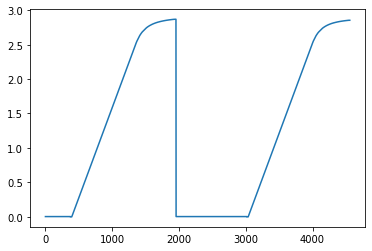

In [36]:
plt.plot(data0["Charge_Capacity (Ah)"],label='Charge_Capacity (Ah) history')

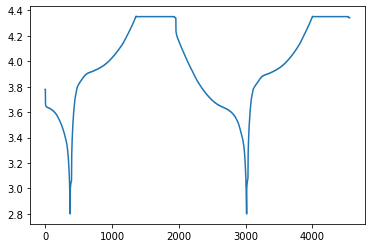

In [37]:
plt.plot(data0["Voltage (V)"],label='Charge_Capacity (Ah) history')

In [38]:
data0 = data0.iloc[:, 1].values

In [39]:
print(data0)

[3.0014000e+01 5.9999000e+01 6.7294000e+01 ... 3.3742750e+04 3.3772734e+04
 3.3772734e+04]


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
data_1 = scaler.fit_transform(data0.reshape(-1, 1))

In [43]:
x_training_data = []

y_training_data =[]

In [44]:
for i in range(1, len(data_1)):

    x_training_data.append(data_1[i-1:i, 0])

    y_training_data.append(data_1[i, 0])

In [45]:
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)

In [46]:
print(x_training_data.shape)

print(y_training_data.shape)

(4558, 1)
(4558,)


In [47]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 

                                               x_training_data.shape[1], 

                                               1))

In [48]:
print(x_training_data.shape)

(4558, 1, 1)


##How to Select how many hidden layer and neurons in a neural network

##THE MODEL

In [49]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout


In [50]:
rnn = Sequential()

In [51]:
rnn.add(LSTM(units = 256, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [52]:
rnn.add(Dropout(0.2))

In [53]:
rnn.add(LSTM(units = 128, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 64, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 32))

rnn.add(Dropout(0.2))

In [54]:
rnn.add(Dense(units = 1))

In [55]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [56]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
143/143 [==============================] - 8s 13ms/step - loss: 0.0630 - accuracy: 4.3879e-04
Epoch 2/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0060 - accuracy: 4.3879e-04
Epoch 3/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0042 - accuracy: 4.3879e-04
Epoch 4/100
143/143 [==============================] - 2s 15ms/step - loss: 0.0038 - accuracy: 4.3879e-04
Epoch 5/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0032 - accuracy: 4.3879e-04
Epoch 6/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0032 - accuracy: 4.3879e-04
Epoch 7/100
143/143 [==============================] - 2s 13ms/step - loss: 0.0029 - accuracy: 4.3879e-04
Epoch 8/100
143/143 [==============================] - 2s 14ms/step - loss: 0.0029 - accuracy: 4.3879e-04
Epoch 9/100
143/143 [==============================] - 2s 14ms/step - loss: 0.0028 - accuracy: 4.3879e-04
Epoch 10/100
143/143 [========================

In [57]:
test = data[data['Cycle_Index']== 2]

In [58]:
test_data = test.iloc[:, 1].values

In [59]:
print(test_data)

[14655.743 14662.75  14669.758 ... 33742.75  33772.734 33772.734]


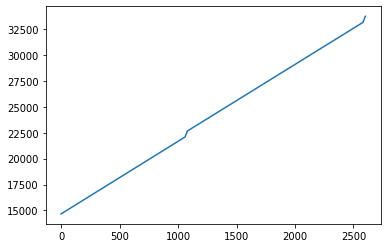

In [60]:
plt.plot(test_data)

In [61]:
unscaled_train = data[data['Cycle_Index'] == 1]
unscaled_test = data[data['Cycle_Index']== 2]

In [62]:
all_data = pd.concat((unscaled_train['Charge_Capacity (Ah)'], unscaled_test['Charge_Capacity (Ah)']), axis = 0)

In [63]:
x_test_data = all_data[len(all_data) - len(test_data) - 1:].values

In [64]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [65]:
x_test_data = scaler.transform(x_test_data)

In [66]:
x_test_data

array([[-0.00080447],
       [-0.0008895 ],
       [-0.0008895 ],
       ...,
       [-0.00080491],
       [-0.00080491],
       [-0.00080491]])

In [67]:
final_x_test_data = []

for i in range(1, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-1:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [68]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 

                                               final_x_test_data.shape[1], 

                                               1))

In [69]:
predictions = rnn.predict(final_x_test_data)

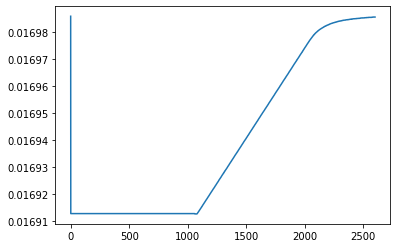

In [70]:
plt.plot(predictions) 

In [71]:
plt.clf()

<Figure size 432x288 with 0 Axes>

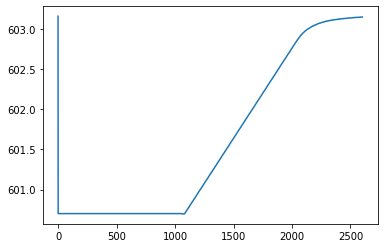

In [72]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.clf() #This clears the first prediction plot from our canvas

plt.plot(unscaled_predictions)

Text(0.5, 1.0, ' Predictions')

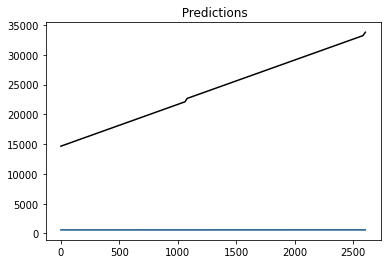

In [73]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title(' Predictions')